In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Using SQLAlchemy `create_engine` to connect hawaii sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Tables names
engine.table_names() 

['measurement', 'station']

In [11]:
# Read query the first entry in measurement table:
query = "SELECT * FROM measurement LIMIT 1"
pd.read_sql_query(query, con=engine)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0


In [12]:
# Read query the first entry in station table:
query = "SELECT * FROM station LIMIT 1"
pd.read_sql_query(query, con=engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [13]:
# Quering the latest date from the measurement table:
query = "SELECT date FROM measurement ORDER BY date DESC LIMIT 1"
pd.read_sql_query(query, con=engine)

,date
0,2017-08-23


In [14]:
# Designing a query to retrieve the last 12 months of precipitation data
# Selecting only the `date` and `prcp` values
# Loading the query results into a Pandas DataFrame and set the index to the date column
query = "SELECT date, prcp FROM measurement WHERE date > '2016-08-24' AND date <'2017-08-23'"
df = pd.read_sql_query(query, con=engine)
df.head()

,date,prcp
0,2016-08-25,0.08
1,2016-08-26,0.00
2,2016-08-27,0.00
3,2016-08-28,0.01
4,2016-08-29,0.00


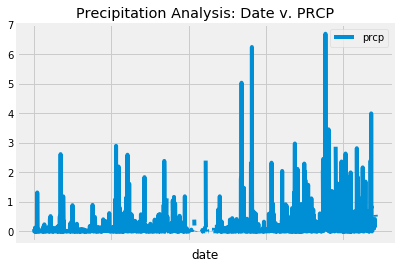

In [15]:
# Plotting the results using the DataFrame `plot` method
df.plot(x= 'date', y='prcp', kind= 'line', title= 'Precipitation Analysis: Date v. PRCP', legend= True)

In [16]:
# Using Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2005.000000
mean,0.172424
std,0.453190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Query to Calculate how many stations are available in the dataset:
query = "SELECT count(station) AS number_of_stations FROM station"
pd.read_sql_query(query, con=engine)

,number_of_stations
0,9


In [18]:
# Query to Find the most active stations and list them with the observation counts in descending order.
query = "SELECT station, COUNT(station) AS count FROM measurement GROUP BY station ORDER BY COUNT(station) DESC"
pd.read_sql_query(query, con=engine)

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [19]:
# listing the station that has the highest number of observation counts:
station = pd.read_sql_query(query, con=engine)
station.head(1)

,station,count
0,USC00519281,2772


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
query = "SELECT station, MIN(tobs), AVG(tobs), MAX(tobs) FROM measurement WHERE station ='USC00519281'"
pd.read_sql_query(query, con=engine)


,station,MIN(tobs),AVG(tobs),MAX(tobs)
0,USC00519281,54.0,71.663781,85.0


In [21]:
# Extra: Query to find out the station that has the highest number of observations using
# functions: `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

query = "SELECT station, MIN(tobs), AVG(tobs), MAX(tobs), COUNT(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC"
pd.read_sql_query(query, con=engine)

,station,MIN(tobs),AVG(tobs),MAX(tobs),COUNT(station)
0,USC00519281,54.0,71.663781,85.0,2772
1,USC00519397,56.0,74.553231,87.0,2724
2,USC00513117,59.0,72.689184,85.0,2709
3,USC00519523,56.0,74.543649,85.0,2669
4,USC00516128,58.0,70.915008,84.0,2612
5,USC00514830,58.0,74.873297,85.0,2202
6,USC00511918,53.0,71.615968,87.0,1979
7,USC00517948,58.0,74.684402,87.0,1372
8,USC00518838,58.0,72.724070,83.0,511


In [22]:
# Query to choose the station with the highest number of temperature observations in the last 12 months
# filtering by the station with the highest number of observations :
query = "SELECT station, tobs FROM measurement WHERE station ='USC00519281' AND date > '2016-08-24' AND date <'2017-08-23'"
df = pd.read_sql_query(query, con=engine)
print(df)

         station  tobs
0    USC00519281  80.0
1    USC00519281  80.0
2    USC00519281  75.0
3    USC00519281  73.0
4    USC00519281  78.0
5    USC00519281  77.0
6    USC00519281  78.0
7    USC00519281  80.0
8    USC00519281  80.0
9    USC00519281  78.0
10   USC00519281  78.0
11   USC00519281  78.0
12   USC00519281  73.0
13   USC00519281  74.0
14   USC00519281  80.0
15   USC00519281  79.0
16   USC00519281  77.0
17   USC00519281  80.0
18   USC00519281  76.0
19   USC00519281  79.0
20   USC00519281  75.0
21   USC00519281  79.0
22   USC00519281  78.0
23   USC00519281  79.0
24   USC00519281  78.0
25   USC00519281  78.0
26   USC00519281  76.0
27   USC00519281  74.0
28   USC00519281  77.0
29   USC00519281  78.0
..           ...   ...
320  USC00519281  72.0
321  USC00519281  74.0
322  USC00519281  74.0
323  USC00519281  76.0
324  USC00519281  80.0
325  USC00519281  80.0
326  USC00519281  76.0
327  USC00519281  76.0
328  USC00519281  76.0
329  USC00519281  77.0
330  USC00519281  77.0
331  USC005

Text(0.5,1,'Temperature Observed for Station USC00519281')

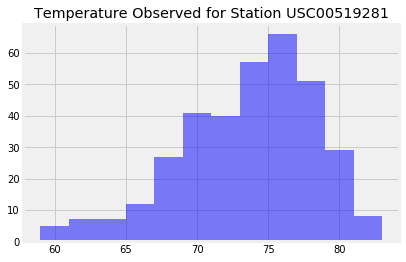

In [23]:
# Plotting the results as a histogram with `bins=12':
df.hist('tobs', bins=12, alpha=0.5, label='yes', color='b')
plt.title("Temperature Observed for Station USC00519281")

In [24]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Using function `calc_temps` to calculate the tmin, tavg, and tmax 
# for my 10 days trip using the previous year's data for those same date
tmin,tavg,tmax = calc_temps('2017-08-15','2017-08-25')[0]
print('tmin='+ str(tmin), 'tavg='+ str(tavg), 'tmax='+ str(tmax))

tmin=70.0 tavg=78.51428571428572 tmax=85.0


<BarContainer object of 1 artists>

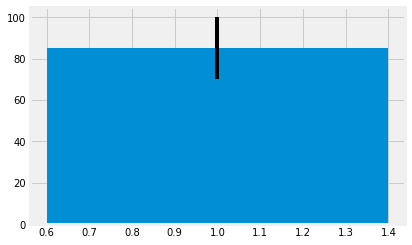

In [27]:
# Plotting the results of the previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# df.barh(tavg, tmax-tmin)
plt.bar(x=1, height=tmax, yerr=tmax-tmin)

In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
query = "SELECT station, date, prcp FROM measurement WHERE date > '2017-08-15' AND date <='2017-08-25' ORDER BY station, date" 
df = pd.read_sql_query(query, con=engine)
df

,station,date,prcp
0,USC00514830,2017-08-16,0.00
1,USC00514830,2017-08-17,0.00
2,USC00514830,2017-08-18,0.00
3,USC00514830,2017-08-19,0.00
4,USC00514830,2017-08-20,0.01
5,USC00514830,2017-08-21,0.02
6,USC00514830,2017-08-23,0.00
7,USC00516128,2017-08-16,0.42
8,USC00516128,2017-08-17,0.13
9,USC00516128,2017-08-18,NaN


In [29]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
query = "SELECT station.station, name, latitude, longitude, elevation, sum(prcp) \
FROM station JOIN measurement ON station.station= measurement.station GROUP BY name ORDER BY sum(prcp) DESC"
pd.read_sql_query(query, con=engine)

,station,name,latitude,longitude,elevation,sum(prcp)
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1068.09
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,588.64
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,382.62
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,295.68
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,234.49
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,131.62
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,92.68
7,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,70.87
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,43.44
